<a href="https://colab.research.google.com/github/ramzesssina/Intelligent-information-systems/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%BD%D0%BE%D0%BC%D0%B5%D1%80_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 5
# Тема: классификация с использованием нейронной сети

Вариант 14

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [36]:
data = { "X":[ 3.35012947,-1.43232375, 0.20143134, 1.8424493 , 2.05097373, 1.29362523,
 3.25670669, 0.66960982,-0.35724702, 1.79530047, 0.65711479, 0.88585132,
-0.32704099, 0.50095976, 1.530918 , 0.13265508, 1.38283577, 0.41280023,
-0.23925524, 1.04800801, 0.40579556, 2.82757978,-0.72857653, 0.84516932,
 0.27663409,-0.13696614, 1.59267552, 7.54651959, 7.43525704, 7.26759401,
 7.38322792, 7.32764548, 6.81904652, 7.83330922, 8.25956091, 7.64705346,
 8.12970275, 7.23208884, 7.41964973, 6.40981723, 7.68198746, 7.55425042,
 8.19073728, 8.4305573 , 8.54854033, 6.95131673, 7.82541725, 6.91297077,
 8.01829267, 7.09971294, 8.04521549, 7.73772204, 7.69840583, 8.57585732,
13.06672897,12.04022892,12.64144239,13.17462988,13.05306076,12.55409475,
13.52258252,13.72310762,13.35458057,13.30473651,13.607926 ,12.97640145,
12.17667948,11.96845219,13.6401017 ,13.31225452,12.57713491,12.81171533,
13.09301394,13.50510767,12.20711703,13.01040159,12.97640169,13.09975665,
13.71352789,12.54183383,12.53466129,18.20129051,18.45383411,20.8682577 ,
20.35061244,19.9570357 ,19.1897396 ,18.96615808,22.0033902 ,18.23616289,
20.24467854,18.59988036,21.93396387,17.64242038,21.8265743 ,17.94485305,
18.81425463,19.31239322,19.38276384,20.28564004,21.70682014,19.77573927,
19.25916921,19.42526421,18.37439571,20.3836191 ,19.50195984,19.44266664],
"Y":[ 4.62032038, 4.84091086, 5.16884059, 4.24068638, 5.21873954, 5.67372384,
 5.74929443, 5.07177791, 4.98973159, 5.26670931, 5.24943228, 5.51395583,
 5.04620009, 5.19448826, 4.65818677, 4.00586075, 4.90323075, 6.1755316 ,
 4.20223703, 5.40033615, 4.92340091, 4.86522897, 5.0004633 , 4.63325381,
 5.3790193 , 4.68766649, 5.16225673, 1.60789656, 2.55751926, 1.17082785,
 1.0746416 , 0.93288088, 2.25618699, 0.5036821 , 1.11603055, 2.19770404,
 2.61436368, 1.99258756, 1.90896052, 1.48473919, 1.7874632 , 1.47811692,
 0.47554838, 1.37546431, 1.57355385, 1.99863736, 2.01515156, 1.40744227,
 1.24506381, 2.13361325, 2.16832836, 1.34933119, 1.88948244, 1.4517392 ,
 8.51243467,10.95754741, 7.99550364, 7.02261018, 7.20469123, 9.7062176 ,
 8.57205366, 9.80823849, 9.08256218, 9.93910987, 7.54551275,10.8480473 ,
 9.32576937, 8.67357587, 9.89960656, 8.88711901, 8.54414568, 9.08641519,
 9.3251713 ,11.31772603,10.05072183, 9.69460495,11.2997733 , 9.64905338,
11.99685837, 9.49380535,11.60865738,17.96060446,16.38393171,18.09381418,
15.96471764,18.58137038,17.66109256,18.22188709,16.98341519,17.18721657,
17.63847714,16.71036109,14.91524699,17.21575879,19.19494561,16.0877184 ,
17.34901255,16.90919685,18.05883807,16.45877624,17.63094675,18.74058225,
17.9627944 ,16.96238333,17.0112509 ,19.47359407,18.8739598 ,15.94159711],
"class":['G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1',
'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2',
'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G3',
'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3',
'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4',
'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4'] }

In [37]:
#Преобразовываем данные в формат CSV
pd.DataFrame(data).to_csv("data.csv")

In [38]:
pd.DataFrame(data).head(10)


,X,Y,class
0,3.350129,4.620320,G1
1,-1.432324,4.840911,G1
2,0.201431,5.168841,G1
3,1.842449,4.240686,G1
4,2.050974,5.218740,G1
5,1.293625,5.673724,G1
6,3.256707,5.749294,G1
7,0.669610,5.071778,G1
8,-0.357247,4.989732,G1
9,1.795300,5.266709,G1


In [39]:
#создаем набор входных данных Х
X = np.c_[data["X"], data["Y"]]

In [40]:
#нормируем входы:
xmin = np.min(X)
Xnorm = (X - xmin) / (np.max(X) - xmin)

In [41]:
#для формирования выходных данных категорий,
#их необходимо закодировать в бинарном виде One-Hot:

ohe = OneHotEncoder(sparse_output = False)
Yenc = ohe.fit_transform( np.array(data["class"]).reshape(-1,1) )

In [42]:
#проверка размерностей входных и выходных данных
print(f"Форма тензора X: {Xnorm.shape}")
print(f"Форма тензора Y: {Yenc.shape}")

Форма тензора X: (108, 2)
Форма тензора Y: (108, 4)


In [43]:
#входные и выходные данные необходимо разбить на
#обучающую и тестовую выборки

xTrain, xTest, yTrain, yTest = train_test_split(Xnorm, Yenc, test_size = 0.25)
print(f"Форма тензора Xtrain: {xTrain.shape}")
print(f"Форма тензора Ytrain: {yTrain.shape}")
print(f"Форма тензора Xtest: {xTest.shape}")
print(f"Форма тензора Ytest: {yTest.shape}")

Форма тензора Xtrain: (81, 2)
Форма тензора Ytrain: (81, 4)
Форма тензора Xtest: (27, 2)
Форма тензора Ytest: (27, 4)


#Построение нейронной сети с помощью Tensorflow

In [44]:
model = Sequential( [
 Dense( units = 4, activation = "relu", input_shape = (2,) ),
 Dense( units = 4, activation = "relu"),
 Dense( units = yTrain.shape[1], activation = "sigmoid" )
] )

model.compile( optimizer = "adam", loss = "categorical_crossentropy", metrics = ["categorical_accuracy"] )
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.2353 - loss: 1.3114    
Epoch 2/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.3605 - loss: 1.2902 
Epoch 3/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.3636 - loss: 1.2886 
Epoch 4/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.3212 - loss: 1.2487 
Epoch 5/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.1944 - loss: 1.2867 
Epoch 6/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.2414 - loss: 1.2609 
Epoch 7/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.2506 - loss: 1.2591 
Epoch 8/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.2744 - loss: 1.2284 
Epoch 9/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.2961 - loss: 1.2098 
Epoch 10/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.2252 - loss: 1.2353     
Epoch 11/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

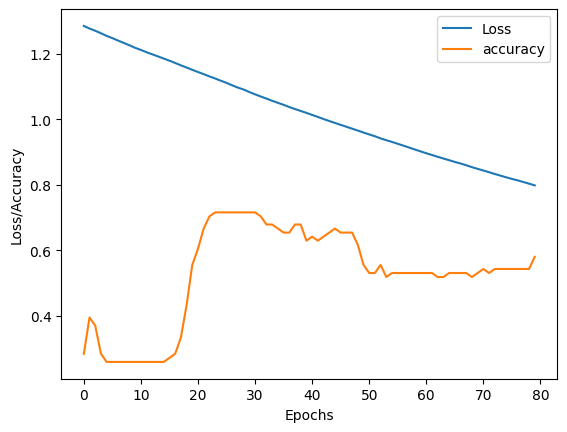

In [45]:
#обучение нейронной сети
hist = model.fit( x = xTrain, y = yTrain, epochs = 80, batch_size = 10 )

plt.plot(hist.history["loss"], label = "Loss")
plt.plot(hist.history["categorical_accuracy"], label = "accuracy")
plt.ylabel("Loss/Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [46]:
#оценка модели на тестовой выборке
model.evaluate( xTest, yTest )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - categorical_accuracy: 0.6667 - loss: 0.7936


[0.7935771346092224, 0.6666666865348816]

In [47]:
#пройдем каждый пример тестовой выборки отдельно:
match = 0

for i in range(len(xTest)):
  x = xTest[i]
  y = yTest[i]

  #для подачи вектора на вход нейросети, его необходимо преобразовать к
  #двумерному тензору формата (1 строка, n столбцов)

  yPred = model.predict( x.reshape(1,-1) )

  # на выходе yPred также представляет собой двумерный объект
  # из одной строки - вектора логитов - выходов сигмоид (можно посмотреть print(yPred))
  # нам нужно выбрать максимальный из них

  maxLogit = np.argmax(yPred)

  # этот индекс - номер группы объекта, но точно лучше узнать в нашем
  # OneHotEncoder'е - без обратного преоразования можно их посмотреть в массиве categories_
  # номера соответствуют порядку категорий в нем
  # фактическое значение категории (на самом деле которое нам известно - из тестовой выборки)

  yAct = np.argmax(y)

  if maxLogit == yAct:
    match += 1

  print(f"Распознали как группу {ohe.categories_[0][maxLogit]} на самом деле: {ohe.categories_[0][yAct]}" )

print(f"Верно распознано {match} из {len(xTest)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Распознали как группу G2 на самом деле: G2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Распознали как группу G4 на самом деле: G4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Распознали как группу G2 на самом деле: G2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Распознали как группу G4 на самом деле: G4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Распознали как группу G4 на самом деле: G4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Распознали как группу G4 на самом деле: G3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Распознали как группу G3 на самом деле: G3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Распознали как группу G4 на самом деле: G3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Распознали как группу G2 на самом деле: G1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Распознали как группу G2 на самом деле: G1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Распознали как группу G2 на самом деле: G2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Распознали как группу G2 на самом деле: G2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 